# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create the full URL for the API request
    url_with_key = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url_with_key).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | suklayin
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | corredor
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | miracema do tocantins
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | fort st. john
Processing Record 16 of Set 1 | teguise
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | nemuro
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,suklayin,15.7574,121.5503,296.90,94,31,1.07,PH,1702146163
1,whitehorse,60.7161,-135.0538,261.58,84,100,1.54,CA,1702146163
2,port-aux-francais,-49.3500,70.2167,276.61,79,65,11.61,TF,1702146164
3,jamestown,42.0970,-79.2353,287.35,59,100,6.69,US,1702146164
4,waitangi,-43.9535,-176.5597,288.05,86,82,6.26,NZ,1702146164


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,suklayin,15.7574,121.5503,296.90,94,31,1.07,PH,1702146163
1,whitehorse,60.7161,-135.0538,261.58,84,100,1.54,CA,1702146163
2,port-aux-francais,-49.3500,70.2167,276.61,79,65,11.61,TF,1702146164
3,jamestown,42.0970,-79.2353,287.35,59,100,6.69,US,1702146164
4,waitangi,-43.9535,-176.5597,288.05,86,82,6.26,NZ,1702146164


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

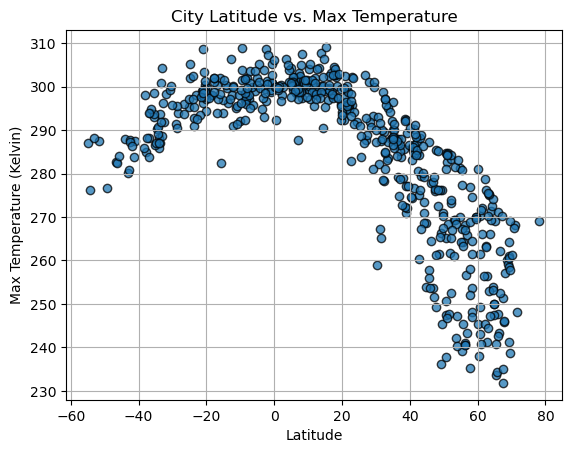

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

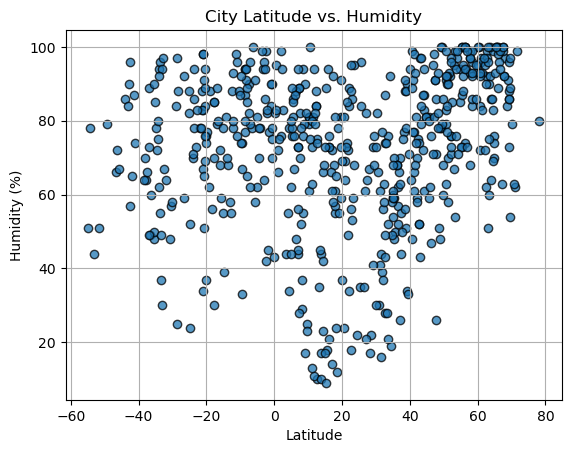

In [14]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

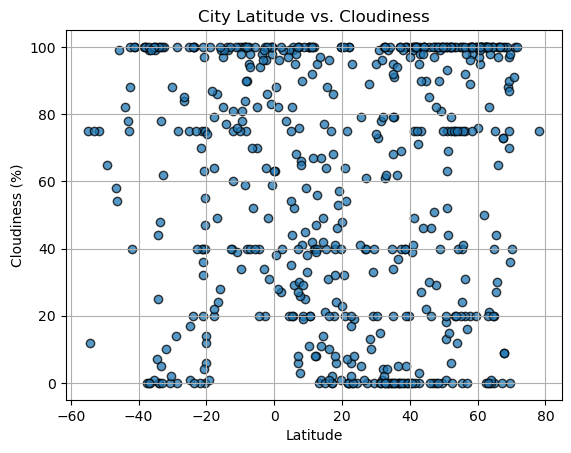

In [15]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

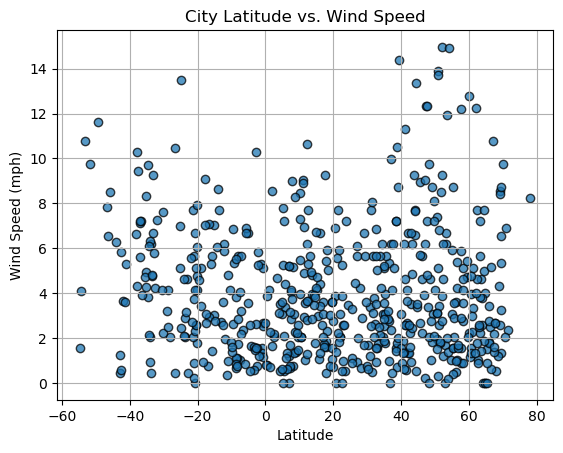

In [16]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_position, save_filename):
    """
    Create a linear regression plot.

    Parameters:
    - x_values: The x-axis data (e.g., latitude).
    - y_values: The y-axis data (e.g., temperature, humidity, cloudiness, wind speed).
    - title: The title for the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    - line_position: The position of the linear regression line ('equator' or 'hemisphere').
    - save_filename: The filename to save the plot as an image.

    Returns:
    None
    """

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Print the linear regression equation
    equation = f"Linear Regression Equation: y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(equation)

    # Print the R² value
    r_squared = round(rvalue**2, 2)
    print(f"R² = {r_squared}")

    # Create a smaller figure size
    fig, ax = plt.subplots(figsize=(4, 3))  # Adjust width and height as needed

    # Create scatter plot
    ax.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

    # Plot the regression line
    ax.plot(x_values, regress_values, "r-")

    # Set labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Save the figure with a custom DPI value
    fig.savefig(save_filename, dpi=60, bbox_inches='tight')

    # Show plot
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,suklayin,15.7574,121.5503,296.90,94,31,1.07,PH,1702146163
1,whitehorse,60.7161,-135.0538,261.58,84,100,1.54,CA,1702146163
3,jamestown,42.0970,-79.2353,287.35,59,100,6.69,US,1702146164
5,corredor,8.6400,-82.9460,299.68,55,20,2.26,CR,1702146164
10,stanley,54.8680,-1.6985,281.36,94,75,1.03,GB,1702146165


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,276.61,79,65,11.61,TF,1702146164
4,waitangi,-43.9535,-176.5597,288.05,86,82,6.26,NZ,1702146164
6,edinburgh of the seven seas,-37.0676,-12.3116,288.12,89,99,7.13,SH,1702146164
7,adamstown,-25.0660,-130.1015,295.20,82,100,6.98,PN,1702146164
8,miracema do tocantins,-9.5618,-48.3967,308.83,33,78,2.62,BR,1702146164


###  Temperature vs. Latitude Linear Regression Plot

Linear Regression Equation: y = -0.8x + 310.06
R² = 0.72


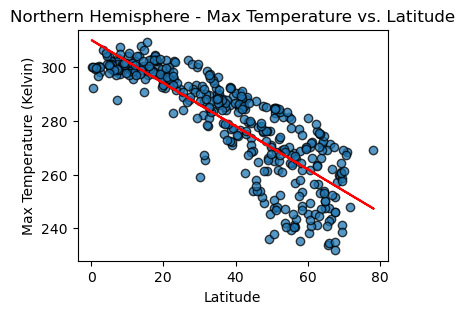

In [48]:
# Linear regression on Northern Hemisphere for temperature vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temperature vs. Latitude", 
                       "Latitude", "Max Temperature (Kelvin)", (5, 260), 
                       "Northern_Hemisphere_Temperature_vs_Latitude.png")

Linear Regression Equation: y = 0.33x + 302.87
R² = 0.51


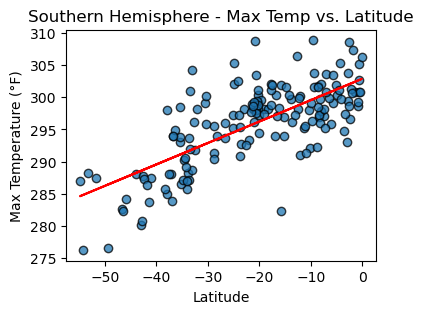

In [49]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Southern Hemisphere - Max Temp vs. Latitude',
                       'Latitude', 'Max Temperature (°F)', (0.05, 0.2),
                       'southern_hemi_temp_vs_lat.png')

**Discussion about the linear relationship:** For the northern hemisphere, the linear regression indicates that max temperature decreases as latitude increases. Conversely, for the southern hemisphere max temperature increases as latitude increases. With a higher R-value for the northern hemisphere, that indicates a stronger correlation for the data than that of the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Linear Regression Equation: y = 0.45x + 55.29
R² = 0.17


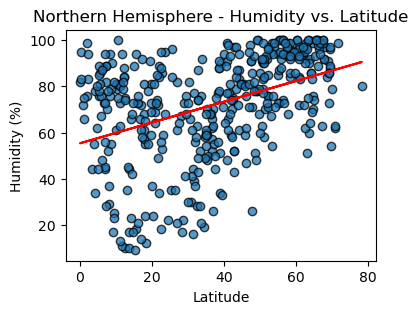

In [50]:
# Call the function for Northern Hemisphere humidity vs. latitude
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Northern Hemisphere - Humidity vs. Latitude',
                       'Latitude', 'Humidity (%)', (0.05, 0.8),
                       'northern_hemi_humidity_vs_lat.png')

Linear Regression Equation: y = 0.27x + 79.68
R² = 0.05


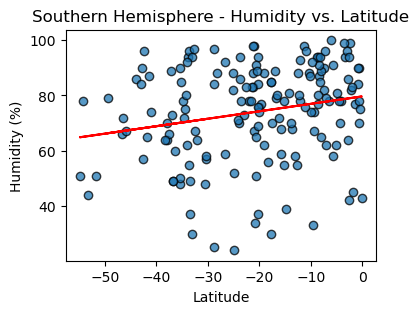

In [51]:
# Call the function for Southern Hemisphere humidity vs. latitude
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Southern Hemisphere - Humidity vs. Latitude',
                       'Latitude', 'Humidity (%)', (0.05, 0.2),
                       'southern_hemi_humidity_vs_lat.png')

**Discussion about the linear relationship:** Both the northern and southern hemispheres show a slight increase in humidity as latitude increases, however with R-values of .17 and .05 neither indicate a notable correlation between the two. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear Regression Equation: y = 0.38x + 42.24
R² = 0.04


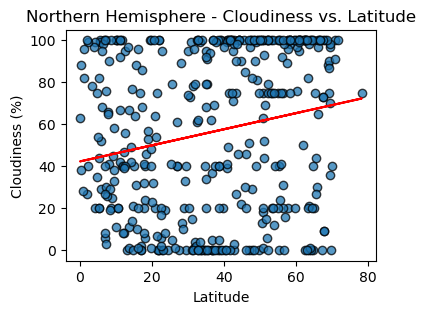

In [52]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Northern Hemisphere - Cloudiness vs. Latitude',
                       'Latitude', 'Cloudiness (%)', (0.05, 0.2),
                       'northern_hemi_cloudiness_vs_lat.png')

Linear Regression Equation: y = 0.38x + 72.7
R² = 0.02


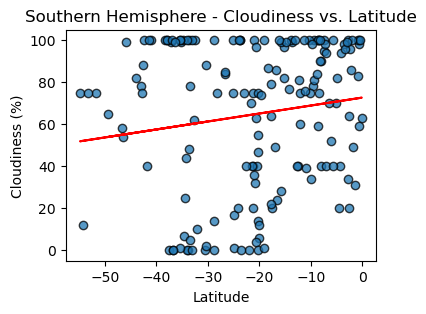

In [53]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere - Cloudiness vs. Latitude',
                       'Latitude', 'Cloudiness (%)', (0.05, 0.8),
                       'southern_hemi_cloudiness_vs_lat.png')

**Discussion about the linear relationship:** Both plots indicate a very small upward trajectory for cloudiness as latitude increases. With very small r-values of .04 and .02, we can conclude that there is no relationship between the two. 

### Wind Speed vs. Latitude Linear Regression Plot

Linear Regression Equation: y = 0.01x + 3.34
R² = 0.01


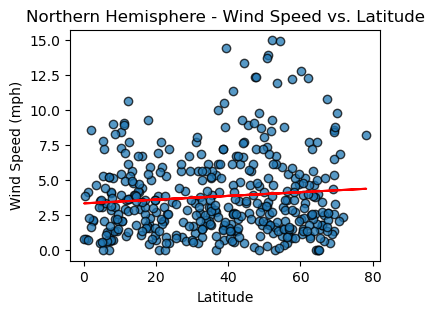

In [54]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Northern Hemisphere - Wind Speed vs. Latitude',
                       'Latitude', 'Wind Speed (mph)', (0.05, 0.8),
                       'northern_hemi_wind_speed_vs_lat.png')

Linear Regression Equation: y = -0.07x + 2.71
R² = 0.13


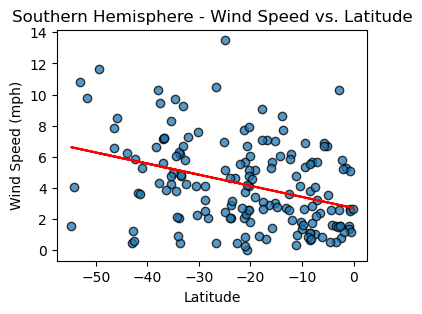

In [55]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere - Wind Speed vs. Latitude',
                       'Latitude', 'Wind Speed (mph)', (0.05, 0.2),
                       'southern_hemi_wind_speed_vs_lat.png')

**Discussion about the linear relationship:** In the northern hemisphere, the r-value of .01 indicates little to no relationship between wind speed and latitude. In the southern hemisphere, there is a slight relationship with wind speed decreasing as latitude increases, but an r-value of .13 does not indicate a notable correlation. 